In [1]:
import os 
import pandas as pd
from collections import defaultdict
import numpy as np 
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gene_eq_path = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v3_d2d2574_conf2_annotFrame_cap0_runs/TCGA_Breast_1102'


In [3]:
# Save intermediate file 
df_plot = pd.read_csv(os.path.join(gene_eq_path, 'exp_427_kmers_plot.csv.gz'), 
                      compression = 'gzip' )

/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df_plot.head()

,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,readFrameAnnotated,junctionAnnotated,...,TCGAWTAB4101A11RA41B07all,TCGAWTAB4401A11RA41B07all,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all,isCrossJunction,junctionAnnotated_kmer,readFrameAnnotated_kmer,recurrence
0,2,56,1,0,0,ENSG00000060339.14,68737048_68742427,AAAALQQHS,0,0,...,0.0,0.0,6.0,0.0,0.0,3.0,True,0.0,0,970
1,2,0,1,0,0,ENSG00000060339.14,68742430_68742487,AAAALQQHS,0,0,...,0.0,0.0,6.0,0.0,0.0,3.0,True,0.0,0,970
2,4,12,0,0,0,ENSG00000119333.11,128640690_128637027,AAADGVLSV,0,1,...,72.0,28.0,156.0,164.0,112.0,651.0,True,1.0,0,1100
3,5,12,0,0,1,ENSG00000119333.11,128640690_128636438,AAADGWTMG,0,1,...,0.0,1.0,2.0,1.0,0.0,4.0,True,1.0,0,972
4,6,12,0,0,0,ENSG00000119333.11,128640690_128636438,AAADGWTMG,0,1,...,0.0,1.0,2.0,1.0,0.0,4.0,True,1.0,0,972


In [5]:
df_plot['junctionAnnotated'] = df_plot['junctionAnnotated'].astype(str)
df_plot['readFrameAnnotated'] = df_plot['readFrameAnnotated'].astype(str)

In [6]:
df_plot['MHC-I binding status'] = 'not computed'

In [7]:
df_plot.loc[df_plot['percentile_rank'] <=2 ,
            'MHC-I binding status'] = 'strong binder'
df_plot.loc[ (10 >= df_plot['percentile_rank']) &
              (df_plot['percentile_rank'] > 2), 
            'MHC-I binding status'] = 'weak binder'
df_plot.loc[ 10 < df_plot['percentile_rank'] ,
            'MHC-I binding status'] = 'not binder'

In [8]:
df_plot.columns

Index(['>pepID', 'jx_pos', 'between_codons', 'includes_5'', 'includes_3'',
       'gene', 'jx_coord', 'kmer', 'readFrameAnnotated', 'junctionAnnotated',
       ...
       'TCGAWTAB4401A11RA41B07all', 'TCGAXXA89901A11RA36F07all',
       'TCGAXXA89A01A11RA36F07all', 'TCGAZ7A8R501A42RA41B07all',
       'TCGAZ7A8R601A11RA41B07all', 'isCrossJunction',
       'junctionAnnotated_kmer', 'readFrameAnnotated_kmer', 'recurrence',
       'MHC-I binding status'],
      dtype='object', length=1122)

In [9]:
meta_cols = [ col for col in df_plot.columns if 'TCGA' not in col ] 
cohort = [ col for col in df_plot.columns if 'TCGA' in col ] 

In [10]:
meta_cols

['>pepID',
 'jx_pos',
 'between_codons',
 "includes_5'",
 "includes_3'",
 'gene',
 'jx_coord',
 'kmer',
 'readFrameAnnotated',
 'junctionAnnotated',
 'peptide',
 'percentile_rank',
 'affinity',
 'strand',
 'GTEX_presence',
 'isCrossJunction',
 'junctionAnnotated_kmer',
 'readFrameAnnotated_kmer',
 'recurrence',
 'MHC-I binding status']

# Exploration 

### All 

number of kmers 29887


<AxesSubplot:xlabel='recurrence', ylabel='Count'>

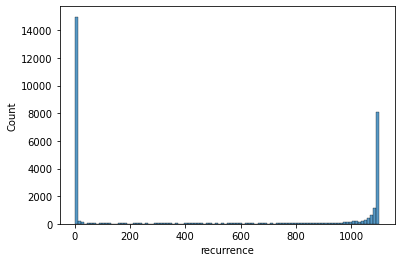

In [217]:
tmp = df_plot.loc[
                    (df_plot['recurrence'] > 0),
                  ['recurrence', 'kmer', 'GTEX_presence' ]].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

### Remove if present in GTEX Graph  

number of kmers 9047


<AxesSubplot:xlabel='recurrence', ylabel='Count'>

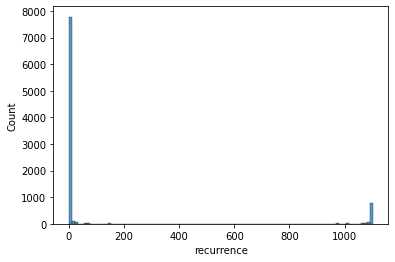

In [218]:
tmp = df_plot.loc[df_plot['GTEX_presence'] == 0
                   & (df_plot['recurrence'] > 0),
                  ['recurrence', 'kmer', 'GTEX_presence' ]].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

### Remove if kmer comes from an annotated junction (or on the same 3-exon peptide)

In [184]:
df_plot['junctionAnnotated_kmer'].unique()

array([0., 1.])

number of kmers 4001


<AxesSubplot:xlabel='recurrence', ylabel='Count'>

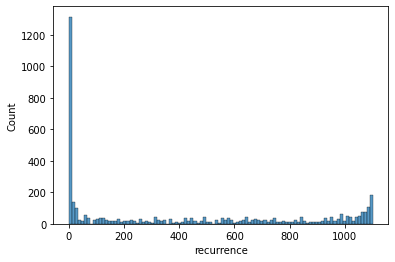

In [255]:
tmp = df_plot.loc[df_plot['junctionAnnotated_kmer'] == 0
                   & (df_plot['recurrence'] > 0), 
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

In [179]:
df_plot['junctionAnnotated'].unique()

array([0, 1, '1', '0', '0/1', '0/nan'], dtype=object)

number of kmers 1696


<AxesSubplot:xlabel='recurrence', ylabel='Count'>

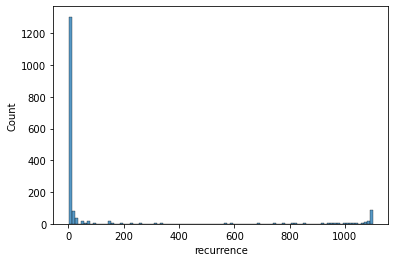

In [11]:
tmp = df_plot.loc[((df_plot['junctionAnnotated'] == '0') | 
                   (df_plot['junctionAnnotated'] == '0/nan') ) &
                   (df_plot['recurrence'] > 0) &
                  (df_plot['GTEX_presence'] == 0) , 
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

# Remove if kmer comes from an annotated junction (or on the same 3-exon peptide) 
# Remove GTEX junctions with graph 

number of kmers 1398


<AxesSubplot:xlabel='recurrence', ylabel='Count'>

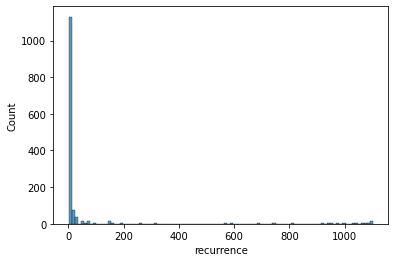

In [12]:
tmp = df_plot.loc[(df_plot['GTEX_presence'] == 0) &
                  (df_plot['junctionAnnotated_kmer'] == 0) &
                  (df_plot['recurrence'] > 0), 
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

number of kmers 1244


<AxesSubplot:xlabel='recurrence', ylabel='Count'>

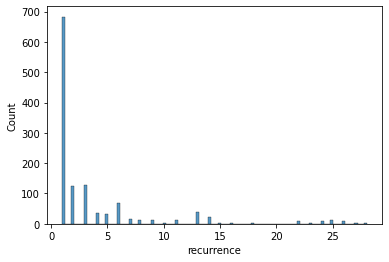

In [18]:
tmp = df_plot.loc[(df_plot['GTEX_presence'] == 0) &
                  (df_plot['junctionAnnotated_kmer'] == 0) &
                  (df_plot['recurrence'] > 0) &
                  (df_plot['recurrence'] < 30), 
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

# Figure1 

In [261]:
tmp = df_plot.loc[(df_plot['GTEX_presence'] == 0) &
                  (df_plot['junctionAnnotated_kmer'] == 0) &
                  (df_plot['recurrence'] > 0), 
                  ['recurrence', 'kmer', 'GTEX_presence', 
                  'readFrameAnnotated'] + cohort ].drop_duplicates()
print('number of kmers', tmp.shape[0])
# Remark, here 442 non unique with read_frame_annot = 1 or read_frame_annot = 0 

number of kmers 1439


In [262]:
tmp[tmp == 0] = np.nan
means = np.nanmean(tmp.loc[:, cohort], axis=1)
medians = np.nanmedian(tmp.loc[:, cohort], axis=1)

In [263]:
tmp['mean_exp'] = means
tmp['median_exp'] = medians

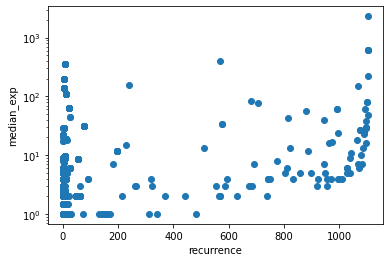

In [264]:
plt.scatter(tmp['recurrence'], tmp['median_exp'])
plt.xlabel('recurrence')
plt.ylabel('median_exp')
plt.yscale("log")  
#plt.ylim([0.1, max(tmp['median_exp'])])

number of kmers 1439


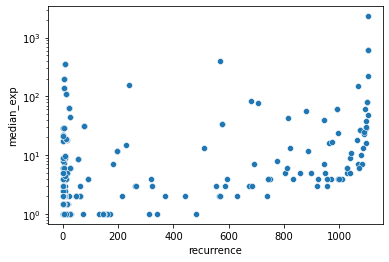

In [269]:
sns.scatterplot(data = tmp, x = 'recurrence', y= 'median_exp'
                #, hue = 'readFrameAnnotated'
               )
print('number of kmers', tmp.shape[0])
plt.xlabel('recurrence')
plt.ylabel('median_exp')
plt.yscale("log")  
plt.grid(True)
#plt.ylim([0.1, max(tmp['median_exp'])])

# Figure 2

In [301]:
tmp = df_plot.loc[(df_plot['GTEX_presence'] == 0) &
                  (df_plot['junctionAnnotated_kmer'] == 0) &
                  (df_plot['recurrence'] > 0) &
                  (df_plot['TCGAC8A12P01A11RA11507all'] > 0) , 
                  ['recurrence', 'kmer', 'GTEX_presence', 
                  'MHC-I binding status', 
                  'percentile_rank', 
                  ] + cohort ].drop_duplicates()
print('number of kmers in sample TCGAC8A12P01A11RA11507all', tmp.shape[0])

number of kmers in sample TCGAC8A12P01A11RA11507all 695


number of kmers 695


(0.1, 2472.0)

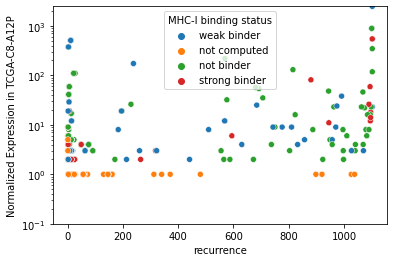

In [302]:
sns.scatterplot(data = tmp, x = 'recurrence', y = 'TCGAC8A12P01A11RA11507all'
                , hue = 'MHC-I binding status'
               )
print('number of kmers', tmp.shape[0])
plt.xlabel('recurrence')
plt.ylabel('Normalized Expression in TCGA-C8-A12P')
plt.yscale("log")  
plt.ylim([0.1, max(tmp['TCGAC8A12P01A11RA11507all'])])

 Remark, did not compute the binding for the kmers which had expression < 2 in first pass

In [305]:
tmp.loc[tmp['MHC-I binding status'] == 'not computed', 'TCGAC8A12P01A11RA11507all'].describe()


count    318.000000
mean       2.119497
std        6.289910
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max      110.000000
Name: TCGAC8A12P01A11RA11507all, dtype: float64

# Figure 3 

In [323]:
tmp = pd.melt(df_plot, id_vars=['gene', 'kmer'], value_vars=cohort, 
             value_name='Normalized RNA expression of junction', 
             var_name='sample')

In [324]:
tmp.head()

,gene,kmer,sample,Normalized RNA expression of junction
0,ENSG00000060339.14,AAAALQQHS,TCGA3CAAAU01A11RA41B07all,4.0
1,ENSG00000060339.14,AAAALQQHS,TCGA3CAAAU01A11RA41B07all,4.0
2,ENSG00000119333.11,AAADGVLSV,TCGA3CAAAU01A11RA41B07all,243.0
3,ENSG00000119333.11,AAADGWTMG,TCGA3CAAAU01A11RA41B07all,2.0
4,ENSG00000119333.11,AAADGWTMG,TCGA3CAAAU01A11RA41B07all,2.0


In [328]:
vals =  df_plot.loc[ : , ['kmer', sample]]

In [329]:
vals.head()

,kmer,TCGAA2A04R01A41RA10907all
0,AAAALQQHS,1.0
1,AAAALQQHS,1.0
2,AAADGVLSV,340.0
3,AAADGWTMG,3.0
4,AAADGWTMG,3.0


In [350]:
test.items()


dict_items([('AAAALQQHS', 1.0), ('AAADGVLSV', 340.0), ('AAADGWTMG', 3.0), ('AAAFASPQA', 0.0), ('AAAFTIDVL', 0.0), ('AAAITGLLA', 140.0), ('AAAKTYEPY', 7.0), ('AAALQQHSS', 0.0), ('AAALYKISD', 0.0), ('AAAPGSQPL', 26.0), ('AAAQAVQGG', 109.0), ('AAAQRFGSQ', 27.0), ('AAAQTWQRR', 53.0), ('AAATDTTVA', 29.0), ('AAATQDLKE', 0.0), ('AAATQTLAV', 0.0), ('AAATTPSPC', 57.0), ('AACSVLFQG', 0.0), ('AADDPERSL', 0.0), ('AADGVLSVY', 340.0), ('AADGWTMGT', 3.0), ('AADILDLGK', 0.0), ('AADKRSIST', 0.0), ('AADPKVNPL', 14.0), ('AAEEKKDEN', 7777.0), ('AAEGAPGSQ', 0.0), ('AAEGDVVDV', 0.0), ('AAEMRRPQQ', 34.0), ('AAFASPQAA', 0.0), ('AAFEELEKT', 0.0), ('AAFTIDVLY', 0.0), ('AAGAGEQAA', 44.0), ('AAGASKGWW', 0.0), ('AAGASSVSP', 0.0), ('AAGDDENHN', 0.0), ('AAGDFFMTG', 0.0), ('AAGEGAPHG', 0.0), ('AAGEQEPDS', 0.0), ('AAGGHGEAP', 101.0), ('AAGGLHGEF', 0.0), ('AAGLSVPNA', 0.0), ('AAGPPKWLT', 17.0), ('AAGRRSGIS', 76.0), ('AAGRSAPEV', 5.0), ('AAGSRGGSP', 0.0), ('AAHATVQGL', 2.0), ('AAIHGSCLP', 0.0), ('AAIIVRAGI', 45.0), ('AA

In [351]:
np.array(list[test.values()])

TypeError: 'type' object is not subscriptable

In [357]:
 idx = vals['kmer'].unique()

In [358]:
vals.set_index('kmer')[idx]

KeyError: "None of [Index(['AAAALQQHS', 'AAADGVLSV', 'AAADGWTMG', 'AAAFASPQA', 'AAAFTIDVL',\n       'AAAITGLLA', 'AAAKTYEPY', 'AAALQQHSS', 'AAALYKISD', 'AAAPGSQPL',\n       ...\n       'YYLHDDREE', 'YYNIGNYWP', 'YYPTEQDSP', 'YYPTFHDGI', 'YYQNQILEA',\n       'YYRHFLQIK', 'YYRYDDMAH', 'YYSFIVLTI', 'YYSFIVQIK', 'YYSYSKFNG'],\n      dtype='object', length=21779)] are in the [columns]"

In [353]:
test

{'AAAALQQHS': 1.0,
 'AAADGVLSV': 340.0,
 'AAADGWTMG': 3.0,
 'AAAFASPQA': 0.0,
 'AAAFTIDVL': 0.0,
 'AAAITGLLA': 140.0,
 'AAAKTYEPY': 7.0,
 'AAALQQHSS': 0.0,
 'AAALYKISD': 0.0,
 'AAAPGSQPL': 26.0,
 'AAAQAVQGG': 109.0,
 'AAAQRFGSQ': 27.0,
 'AAAQTWQRR': 53.0,
 'AAATDTTVA': 29.0,
 'AAATQDLKE': 0.0,
 'AAATQTLAV': 0.0,
 'AAATTPSPC': 57.0,
 'AACSVLFQG': 0.0,
 'AADDPERSL': 0.0,
 'AADGVLSVY': 340.0,
 'AADGWTMGT': 3.0,
 'AADILDLGK': 0.0,
 'AADKRSIST': 0.0,
 'AADPKVNPL': 14.0,
 'AAEEKKDEN': 7777.0,
 'AAEGAPGSQ': 0.0,
 'AAEGDVVDV': 0.0,
 'AAEMRRPQQ': 34.0,
 'AAFASPQAA': 0.0,
 'AAFEELEKT': 0.0,
 'AAFTIDVLY': 0.0,
 'AAGAGEQAA': 44.0,
 'AAGASKGWW': 0.0,
 'AAGASSVSP': 0.0,
 'AAGDDENHN': 0.0,
 'AAGDFFMTG': 0.0,
 'AAGEGAPHG': 0.0,
 'AAGEQEPDS': 0.0,
 'AAGGHGEAP': 101.0,
 'AAGGLHGEF': 0.0,
 'AAGLSVPNA': 0.0,
 'AAGPPKWLT': 17.0,
 'AAGRRSGIS': 76.0,
 'AAGRSAPEV': 5.0,
 'AAGSRGGSP': 0.0,
 'AAHATVQGL': 2.0,
 'AAIHGSCLP': 0.0,
 'AAIIVRAGI': 45.0,
 'AAILSANCG': 33.0,
 'AAITGLLAV': 140.0,
 'AAKGRLNAS': 78.0,
 'A

In [345]:
test = {}
for idx, i in vals.iterrows():
    test[i['kmer']] = i['TCGAA2A04R01A41RA10907all']

In [326]:
tmp['Number kmers expressed in sample'] = 0 
for idx, sample in enumerate(cohort):
    print(idx)
    vals =  df_plot.loc[ : , ['kmer', sample]].drop_duplicates()
    vals = vals[sample].values
    tmp.loc[tmp['sample'] == sample, 
            'Number kmers expressed in sample'] = len(np.where(vals > 0 )[0])
    tmp.loc[tmp['sample'] == sample, 
            'Number kmers expressed > 10 in sample'] = len(np.where(vals > 10 )[0])
    tmp.loc[tmp['sample'] == sample, 
            'Number kmers expressed > 100 in sample'] = len(np.where(vals > 100 )[0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


KeyboardInterrupt: 

In [ ]:
tmp = pd.melt(df_plot, id_vars=['gene', 'kmer', 'sample'], 
              value_vars=['Number kmers expressed in sample', 
                          'Number kmers expressed > 10 in sample',
                          'Number kmers expressed > 100 in sample']
             value_name='Candidate kmers per cancer sample', 
             var_name='Expression level')

In [316]:
tmp.head()

,gene,kmer,sample,Normalized RNA expression of junction,Number kmers expressed in sample
0,ENSG00000060339.14,AAAALQQHS,TCGA3CAAAU01A11RA41B07all,4.0,12218
1,ENSG00000060339.14,AAAALQQHS,TCGA3CAAAU01A11RA41B07all,4.0,12218
2,ENSG00000119333.11,AAADGVLSV,TCGA3CAAAU01A11RA41B07all,243.0,12218
3,ENSG00000119333.11,AAADGWTMG,TCGA3CAAAU01A11RA41B07all,2.0,12218
4,ENSG00000119333.11,AAADGWTMG,TCGA3CAAAU01A11RA41B07all,2.0,12218


In [312]:
vals.shape

(21781, 2)

In [73]:
sample = 'TCGA3CAAAU01A11RA41B07all'